<a href="https://colab.research.google.com/github/sonmanwoo/PSA_Study/blob/main/PSA_ML_v1_mw_210814.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Google Colab에는 제가 사용한 AutoML(Pycaret)이 설치되어 있지 않습니다.
#런타임 초기 실행 시 필요합니다.
!pip install pycaret
!pip install shap

In [2]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

raw_df = pd.read_csv("Raw_data_ML-PSA_R1_210730_MW.csv", encoding='cp949')
#에러 발생 시 메일에 유첨된 csv 파일을 업로드 후 실행해 주세요

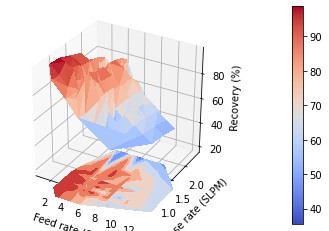

In [4]:
# 데이터 전체 표면 분석
fig = plt.figure()
ax = fig.gca(projection='3d')
X=raw_df['Feed rate (SLPM)']
Y=raw_df['Rinse rate (SLPM)']
Z=raw_df['Recovery (%)']
surf=ax.plot_trisurf(X,Y,Z,cmap='coolwarm',linewidth=0,antialiased=False)
ax.tricontourf(X, Y, Z, zdir='z', offset=-1.2, cmap=cm.coolwarm)
fig.colorbar(surf, pad=0.2)

ax.set_xlabel('Feed rate (SLPM)')
ax.set_ylabel('Rinse rate (SLPM)')
ax.set_zlabel('Recovery (%)')
plt.show()

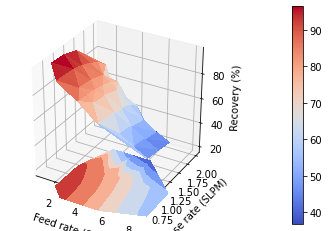

In [5]:
# 데이터 일부 표면 분석 (Pad 2.5 Case)
fig = plt.figure()
ax = fig.gca(projection='3d')
X=raw_df[raw_df['Pad (bar)']==2.5]['Feed rate (SLPM)']
Y=raw_df[raw_df['Pad (bar)']==2.5]['Rinse rate (SLPM)']
Z=raw_df[raw_df['Pad (bar)']==2.5]['Recovery (%)']
surf=ax.plot_trisurf(X,Y,Z,cmap='coolwarm',linewidth=0,antialiased=False)
ax.tricontourf(X, Y, Z, zdir='z', offset=-1.2, cmap=cm.coolwarm)
fig.colorbar(surf, pad=0.2)

ax.set_xlabel('Feed rate (SLPM)')
ax.set_ylabel('Rinse rate (SLPM)')
ax.set_zlabel('Recovery (%)')
plt.show()

In [6]:
#Auto ML을 이용한 Regression Model 구축 (실행 시 Enter 입력 필요)
from pycaret.regression import *
exp_reg101 = setup(data = raw_df.iloc[:,:-1], target = 'Recovery (%)', session_id=123, log_experiment = False)

,Description,Value
0,session_id,123
1,Target,Recovery (%)
2,Original Data,"(171, 6)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(119, 5)"


In [7]:
best1 = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.7167,16.6827,3.8541,0.9500,0.0772,0.0519,0.040
et,Extra Trees Regressor,2.4870,20.1133,4.2335,0.9385,0.0893,0.0522,0.359
rf,Random Forest Regressor,3.4523,32.5726,5.3086,0.8984,0.1116,0.0730,0.410
lr,Linear Regression,5.4934,51.6877,6.8784,0.8342,0.1391,0.1064,0.271
lar,Least Angle Regression,5.4934,51.6877,6.8784,0.8342,0.1391,0.1064,0.014
br,Bayesian Ridge,5.4838,51.7334,6.8874,0.8341,0.1396,0.1066,0.013
huber,Huber Regressor,4.9193,58.3899,7.0770,0.8331,0.1504,0.1075,0.022
dt,Decision Tree Regressor,5.3156,69.7087,7.9793,0.7721,0.1535,0.0983,0.013
ada,AdaBoost Regressor,7.7794,92.2959,9.4980,0.6889,0.1697,0.1367,0.075
ridge,Ridge Regression,7.3467,104.8930,9.6973,0.6870,0.1920,0.1558,0.013


In [8]:
et=create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.2585,3.8124,1.9525,0.9732,0.0237,0.0160
1,2.4150,15.8309,3.9788,0.9429,0.0605,0.0363
2,3.0115,20.9795,4.5803,0.9346,0.0686,0.0485
3,2.2673,10.7524,3.2791,0.9710,0.1146,0.0631
4,2.1637,17.6909,4.2061,0.9400,0.0641,0.0348
5,3.3555,20.0693,4.4799,0.9216,0.0803,0.0621
6,1.1539,3.8994,1.9747,0.9776,0.0328,0.0181
7,3.1038,29.2825,5.4113,0.8640,0.0846,0.0484
8,3.7139,48.3655,6.9545,0.9173,0.1993,0.1144
9,2.4267,30.4507,5.5182,0.9429,0.1650,0.0803


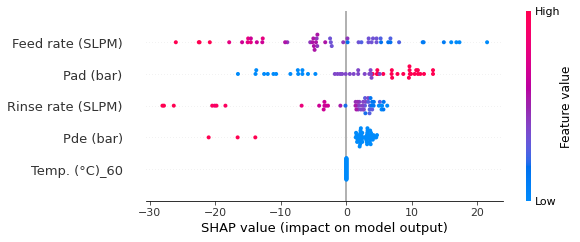

In [11]:
interpret_model(et)

In [12]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [13]:
predictions=predict_model(et, data=raw_df.iloc[:,:-2])

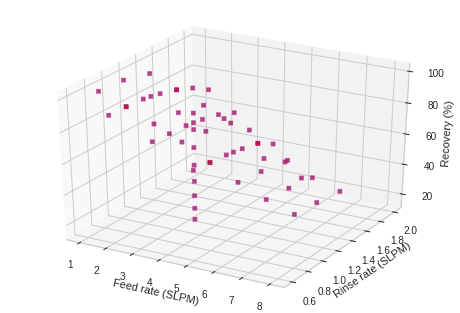

In [14]:
#예측된 데이터 확인 (Real & Prediction, 2.5bar case)
fig = plt.figure()
ax = fig.gca(projection='3d')
X=raw_df[raw_df['Pad (bar)']==2.5]['Feed rate (SLPM)']
Y=raw_df[raw_df['Pad (bar)']==2.5]['Rinse rate (SLPM)']
Z=raw_df[raw_df['Pad (bar)']==2.5]['Recovery (%)']
Zdot=predictions[predictions['Pad (bar)']==2.5]['Label']
ax.scatter(X,Y,Z, c='blue', alpha=0.5)
ax.scatter(X,Y,Z, c='red', alpha=0.5, marker='x')

ax.set_xlabel('Feed rate (SLPM)')
ax.set_ylabel('Rinse rate (SLPM)')
ax.set_zlabel('Recovery (%)')
plt.show()

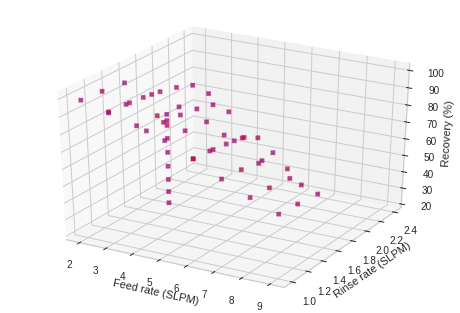

In [15]:
#예측된 데이터 확인 (Real & Prediction, 4bar case)
fig = plt.figure()
ax = fig.gca(projection='3d')
X=raw_df[raw_df['Pad (bar)']==4]['Feed rate (SLPM)']
Y=raw_df[raw_df['Pad (bar)']==4]['Rinse rate (SLPM)']
Z=raw_df[raw_df['Pad (bar)']==4]['Recovery (%)']
Zdot=predictions[predictions['Pad (bar)']==4]['Label']
ax.scatter(X,Y,Z, c='blue', alpha=0.5)
ax.scatter(X,Y,Z, c='red', alpha=0.5, marker='x')

ax.set_xlabel('Feed rate (SLPM)')
ax.set_ylabel('Rinse rate (SLPM)')
ax.set_zlabel('Recovery (%)')
plt.show()

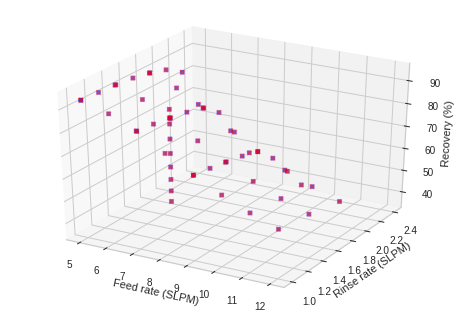

In [16]:
#예측된 데이터 확인 (Real & Prediction, 6.4bar case)
fig = plt.figure()
ax = fig.gca(projection='3d')
X=raw_df[raw_df['Pad (bar)']==6.4]['Feed rate (SLPM)']
Y=raw_df[raw_df['Pad (bar)']==6.4]['Rinse rate (SLPM)']
Z=raw_df[raw_df['Pad (bar)']==6.4]['Recovery (%)']
Zdot=predictions[predictions['Pad (bar)']==6.4]['Label']
ax.scatter(X,Y,Z, c='blue', alpha=0.5)
ax.scatter(X,Y,Z, c='red', alpha=0.5, marker='x')

ax.set_xlabel('Feed rate (SLPM)')
ax.set_ylabel('Rinse rate (SLPM)')
ax.set_zlabel('Recovery (%)')
plt.show()